In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [95]:
myfont = {'fontname':'Comic Sans MS'}

In [96]:
#read in the data
df = pd.read_csv('radars.csv')
df['Player'] = df['Player'].str.split('\\',expand=True)[0] #take the first part of the name

In [97]:
df.head()
#df.Player.unique() veya df['Player'].unique() #to get a list of names for comparison

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [98]:
Player_1 = 'Che Adams'
Player_2 = 'Timo Werner'
Color_1 = 'yellow'
Color_2 = 'dodgerblue'

In [99]:
df = df[(df['Player']==Player_1) | (df['Player']==Player_2)].reset_index(drop=True)
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
1,482,Timo Werner,de GER,FW,Chelsea,24-361,1996,20.5,5,55,...,13.7,0,0,0,8.4,8.4,0.15,-3.4,-3.4,Matches


In [100]:
print(df.columns.tolist())

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches']


In [101]:
for w in range(len(df['Player'])):
    if df['Player'][w] == Player_1:
        Team_1 = df.iloc[w].values.tolist()

Team_1 = Team_1[4]

for w in range(len(df['Player'])):
    if df['Player'][w] == Player_2:
        Team_2 = df.iloc[w].values.tolist()

Team_2 = Team_2[4]

In [102]:
df = df.drop(['Rk','Nation','Pos','Squad','Age','Born','90s','FK','PK','PKatt','Matches'],axis=1) 
df
# drop the columns that are not needed axis=1 column names, axis=0 row names
# Or select the ones you want
#df1 = df[['a','d']]

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Tammy Abraham,6,31,13,41.9,2.73,1.15,0.19,0.46,9.9,5.6,5.6,0.18,0.4,0.4
1,Timo Werner,5,55,21,38.2,2.69,1.03,0.09,0.24,13.7,8.4,8.4,0.15,-3.4,-3.4


In [103]:
#get parameters
params = list(df.columns)
params = params[1:] # will exclude the column Player from the df

In [104]:
#add ranges to list of tuple pairs, her axis için mix-max ve aralık belirlemek için
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25) # 0.25 katı kadar pay bırakacak
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b)) #ranges liste bu aralıkları append eder
    
for x in range(len(df['Player'])):
    if df['Player'][x] == Player_1:
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == Player_2:
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [105]:
#title 

title = dict(
    title_name= Player_1,
    title_color = Color_1,
    subtitle_name = Team_1,
    subtitle_color = Color_1,
    title_name_2= Player_2,
    title_color_2 = Color_2,
    subtitle_name_2 = Team_2,
    subtitle_color_2 = Color_2,
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = '@msuatgunerli data via FBref, StatsBomb, Understat & WhoScored'

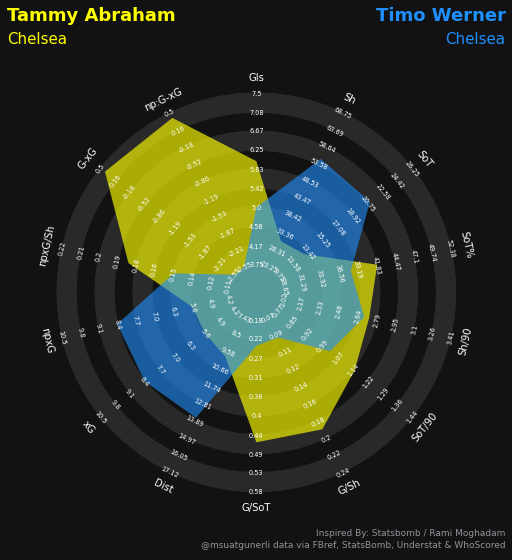

In [106]:
#radar = Radar()
#black radar
radar = Radar(background_color="#121212", patch_color="#292929", label_color="#FFFFFF", range_color="#FFFFFF")

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=[Color_1,Color_2],
                         alphas=[0.65,0.6],title=title,endnote=endnote,
                         compare=True)



In [107]:
#title 

title = dict(
    title_name='Tammy Abraham',
    title_color = '#c20057',
    subtitle_name = 'Chelsea',
    subtitle_color = '#c20057',
    title_name_2='Timo Werner',
    title_color_2 = '#3ea6ce',
    subtitle_name_2 = 'Chelsea',
    subtitle_color_2 = '#3ea6ce', 
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = '@msuatgunerli data via FBref, StatsBomb, Understat & WhoScored'

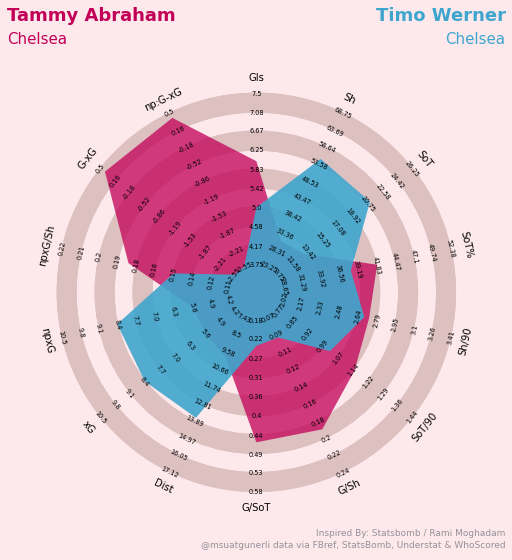

In [108]:
#pink radar #la gazetta colors = #fde9eb pink, #3ea6ce blue, #e45d56 red, #c6d294 green, #ddc0c0 dark pink, #c20057 bordo, #f07821 orange, #2e2e2e black
radar = Radar(background_color="#FDE9EB", patch_color="#ddc0c0", label_color="#000000", range_color="#000000")

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['#c20057','#3ea6ce'],
                         alphas=[0.75,0.9],title=title,endnote=endnote,
                         compare=True)

In [109]:
type(params)

list